# Correlation in Python

Correlation values range between -1 and 1.  
  
There are two key components of a correlation value:  
  
* magnitude – The larger the magnitude (closer to 1 or -1), the stronger the correlation
* sign – If negative, there is an inverse correlation. If positive, there is a regular correlation.

## Positive Correlation

Let’s take a look at a positive correlation. Numpy implements a `corrcoef()` function that returns a matrix of correlations of x with x, x with y, y with x and y with y. We’re interested in the values of correlation of x with y (so position (1, 0) or (0, 1)).

In [1]:
import numpy as np

np.random.seed(1)

# 1000 randim integers between 0 and 50
x = np.random.randint(0, 50, 1000)

# positive correlation with some noise
y = x + np.random.normal(0, 10, 1000)

np.corrcoef(x, y)

array([[1.        , 0.81543901],
       [0.81543901, 1.        ]])

This correlation is 0.815, a strong positive correlation, let’s take a look at a scatter chart.

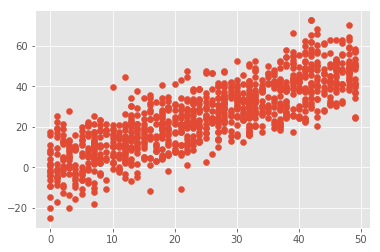

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

plt.scatter(x, y)
plt.show()


## Negative Correlation

What happens to our correlation figure if we invert the correlation such that an increase in `x` results in a decrease in `y`?

In [3]:
# 1000 random integers between 0 and 50
x = np.random.randint(0, 50, 1000)

# Negative Correlation with some noise
y = 100 - x + np.random.normal(0, 5, 1000)

np.corrcoef(x, y)

array([[ 1.        , -0.94957116],
       [-0.94957116,  1.        ]])

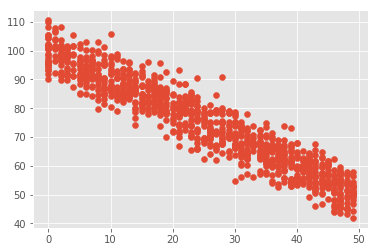

In [4]:
plt.scatter(x, y)
plt.show()


## No/Weak Correlatio

What if there is no correlation between `x` and `y`?

In [5]:
x = np.random.randint(0, 50, 1000)
y = np.random.randint(0, 50, 1000)

np.corrcoef(x, y)

array([[ 1.        , -0.00554681],
       [-0.00554681,  1.        ]])

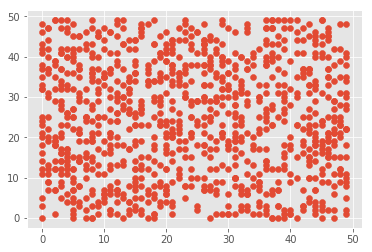

In [6]:
plt.scatter(x, y)
plt.show()

## Correlation Matrix

If we’re using pandas we can create a correlation matrix to view the correlations between different variables in a dataframe:

In [7]:
import pandas as pd

df = pd.DataFrame({})
df['a'] = np.random.randint(0, 50, 1000)
df['b'] = df['a'] + np.random.normal(0, 10, 1000) # positively correlated with 'a'
df['c'] = 100 - df['a'] + np.random.normal(0, 5, 1000) # negatively correlated with 'a'
df['d'] = np.random.randint(0, 50, 1000) # not correlated with 'a'

df.corr()

,a,b,c,d
a,1.000000,0.825361,-0.948845,0.009802
b,0.825361,1.000000,-0.789391,0.011852
c,-0.948845,-0.789391,1.000000,-0.003228
d,0.009802,0.011852,-0.003228,1.000000


We can also view these correlations graphically as a scatter matrix:

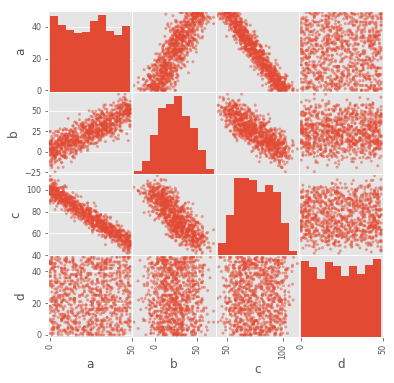

In [8]:
pd.plotting.scatter_matrix(df, figsize=(6, 6))
plt.show()

Or we can directly plot a correlation matrix plot:

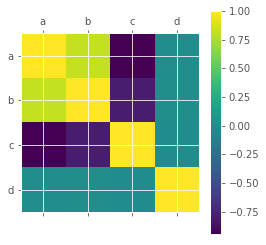

In [9]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()